In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns

In [4]:
#load the dataset
data =pd.read_csv('ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [5]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [6]:
#encode target labels
data['ecosystem_health']=data['ecosystem_health'].map({'healthy':0,'at risk':1,'degraded':2})

In [7]:
data.ecosystem_health

0       2
1       2
2       2
3       2
4       2
       ..
9995    2
9996    1
9997    2
9998    2
9999    2
Name: ecosystem_health, Length: 10000, dtype: int64

In [8]:
#feature selection
X=data.drop('ecosystem_health',axis=1)
y=data['ecosystem_health']

In [9]:
X.shape

(10000, 5)

In [10]:
y.shape

(10000,)

In [11]:
#splitting into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [12]:
X_train.shape

(2000, 5)

In [13]:
X_test.shape

(8000, 5)

In [15]:
#initialise the model and train it
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred=model.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2], shape=(8000,))

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is',accuracy)

Accuracy is 0.95575


In [20]:
#classification report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,y_pred,target_names=['healthy','at risk','degraded']))

Classification Report
              precision    recall  f1-score   support

     healthy       0.96      0.58      0.72        83
     at risk       0.94      0.64      0.76       890
    degraded       0.96      1.00      0.98      7027

    accuracy                           0.96      8000
   macro avg       0.95      0.74      0.82      8000
weighted avg       0.96      0.96      0.95      8000



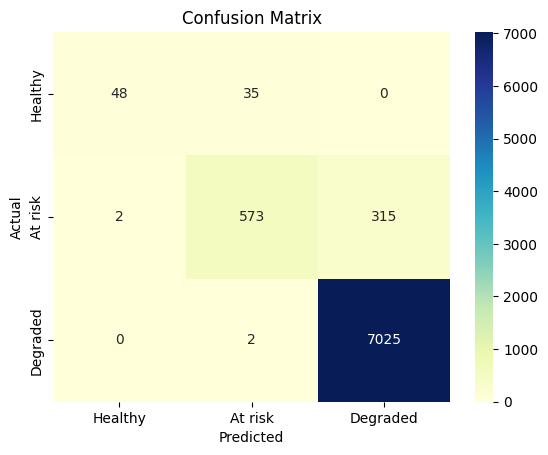

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu',
            xticklabels=['Healthy','At risk','Degraded'],
            yticklabels=['Healthy','At risk','Degraded'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()